This analysis is part of **Microsoft Course for Data Scientist**. In this notebook the aim is to find the reason for delays in departures or arrival of a flight by answering questions.

I couldn't find the dataset link, the information that I have is that this is a real-world dataset containing flights data from the US Department of Transportation.



In [1]:
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt



In [375]:
flights = pd.read_csv('flights.csv')

In [376]:
flights.tail()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
246480,2013,8,16,5,US,14100,Philadelphia International,Philadelphia,PA,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,1425,-3,0.0,1647,1.0,0.0,0.0
246481,2013,7,24,3,AS,12173,Honolulu International,Honolulu,HI,14831,Norman Y. Mineta San Jose International,San Jose,CA,1310,-5,0.0,2111,-9.0,0.0,0.0
246482,2013,8,3,6,EV,14492,Raleigh-Durham International,Raleigh/Durham,NC,11618,Newark Liberty International,Newark,NJ,605,-2,0.0,740,-5.0,0.0,0.0
246483,2013,4,4,4,F9,14747,Seattle/Tacoma International,Seattle,WA,11292,Denver International,Denver,CO,1044,-3,0.0,1415,-8.0,0.0,0.0
246484,2013,6,4,2,AA,12478,John F. Kennedy International,New York,NY,14679,San Diego International,San Diego,CA,1725,-3,0.0,2,NaN,NaN,NaN


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

## Checking null values

In [377]:
flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2499
CRSArrTime              0
ArrDelay                1
ArrDel15                1
Cancelled               1
dtype: int64

We have 4 columns with null values: **DepDel15**, **ArrDelay**, **ArrDel15** and **Cancelled**. Since the last 3 columns have only 1 row with missing value and our file has 246848 rows, I will delete these null values given that it'll not impact our analysis.

The **DepDel15** column has 2499 rows with null values that approximately represents 1% of our data. To me this is 'Ok' to also delete these rows.



In [378]:
flights = flights.dropna()

In [379]:
flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

## Checking for outliers

There are only two columns that might provide us with outliers: DepDelay and ArrDelay.


------- Outliers for ArrDelay---------


count    243985.000000
mean          6.564190
std          38.277549
min         -75.000000
25%         -11.000000
50%          -3.000000
75%          10.000000
max        1440.000000
Name: ArrDelay, dtype: float64

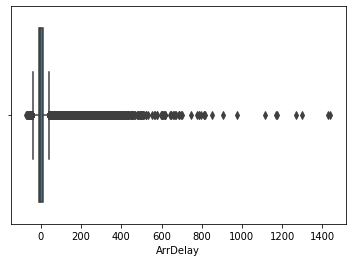

In [380]:
sns.boxplot(x=flights['ArrDelay'])

print("------- Outliers for ArrDelay---------")

flights['ArrDelay'].describe()

------- Outliers for DepDelay---------


count    243985.000000
mean         10.456323
std          35.667803
min         -63.000000
25%          -4.000000
50%          -1.000000
75%           9.000000
max        1425.000000
Name: DepDelay, dtype: float64

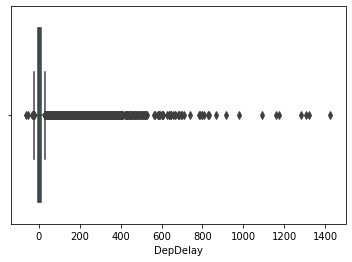

In [381]:
sns.boxplot(x=flights['DepDelay'])

print("------- Outliers for DepDelay---------")

flights['DepDelay'].describe()

We just encountered many outliers for both columns. We can see this clearly in **DepDelay** by checking the 75th percentile, which is 9 whereas the max value is 1425. The same happened with **ArrDelay**. 



In [382]:
flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,243985.0,243985.000000,243985.000000,243985.000000,243985.000000,243985.000000,243985.000000,243985.000000,243985.000000,243985.000000,243985.000000,243985.000000,243985.000000
mean,2013.0,6.983241,15.806607,3.901019,12744.521548,12740.009722,1323.901154,10.456323,0.201250,1504.513146,6.564190,0.208062,0.000586
std,0.0,1.983687,8.804148,1.989310,1502.617706,1503.534004,470.614755,35.667803,0.400935,493.113297,38.277549,0.405922,0.024202
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-63.000000,0.000000,1.000000,-75.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,920.000000,-4.000000,0.000000,1118.000000,-11.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1317.000000,-1.000000,0.000000,1527.000000,-3.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14057.000000,14057.000000,1721.000000,9.000000,0.000000,1917.000000,10.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,1425.000000,1.000000,2359.000000,1440.000000,1.000000,1.000000


In [383]:
#Now I want to check the quantile distribuition to see where I will trim the data.

quantile=[0.75, 0.8, 0.85, 0.9]
col = ['DepDelay', 'ArrDelay']
print(flights[col].quantile(quantile))
    

      DepDelay  ArrDelay
0.75       9.0      10.0
0.80      15.0      15.0
0.85      23.0      23.0
0.90      37.0      38.0


Now to the **negative** values of our columns. The minimum value for **DepDelay** is -63 whereas the 25th percentile is -4. By looking to **ArrDelay** we can see that 25th percentile it's -11 and the minimum value is -73.

In [384]:
quantile=[0.05, 0.1, 0.15, 0.25]
col = ['DepDelay', 'ArrDelay']
print(flights[col].quantile(quantile))

      DepDelay  ArrDelay
0.05      -8.0     -23.0
0.10      -7.0     -19.0
0.15      -6.0     -16.0
0.25      -4.0     -11.0


In [385]:
flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,243985.0,243985.000000,243985.000000,243985.000000,243985.000000,243985.000000,243985.000000,243985.000000,243985.000000,243985.000000,243985.000000,243985.000000,243985.000000
mean,2013.0,6.983241,15.806607,3.901019,12744.521548,12740.009722,1323.901154,10.456323,0.201250,1504.513146,6.564190,0.208062,0.000586
std,0.0,1.983687,8.804148,1.989310,1502.617706,1503.534004,470.614755,35.667803,0.400935,493.113297,38.277549,0.405922,0.024202
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-63.000000,0.000000,1.000000,-75.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,920.000000,-4.000000,0.000000,1118.000000,-11.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1317.000000,-1.000000,0.000000,1527.000000,-3.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14057.000000,14057.000000,1721.000000,9.000000,0.000000,1917.000000,10.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,1425.000000,1.000000,2359.000000,1440.000000,1.000000,1.000000


In [386]:
#It seems fair to trim both columns in the 85th quantile and in the DepDelay 10th quantile
col = ['DepDelay', 'ArrDelay']
for column in col:
    flights = flights[flights[column] <= 23] 
    flights = flights[flights[column] > -7]
  #  flights= flights + df_flights
flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,97072.0,97072.000000,97072.000000,97072.000000,97072.000000,97072.000000,97072.000000,97072.000000,97072.000000,97072.000000,97072.000000,97072.000000,97072.000000
mean,2013.0,6.998465,15.839016,3.888011,12769.995169,12758.046821,1310.985217,3.129172,0.108806,1492.751586,3.350369,0.101533,0.000701
std,0.0,1.971390,8.778397,1.975094,1512.167058,1526.501442,461.586914,7.407395,0.311397,481.135549,7.352769,0.302035,0.026458
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-6.000000,0.000000,1.000000,-6.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,920.000000,-3.000000,0.000000,1118.000000,-3.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1305.000000,0.000000,0.000000,1515.000000,2.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,5.000000,14100.000000,14100.000000,1705.000000,8.000000,0.000000,1901.000000,8.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,23.000000,1.000000,2359.000000,23.000000,1.000000,1.000000


## Now that I had trim the data, I'll plot the box plot again to see it's distribuition

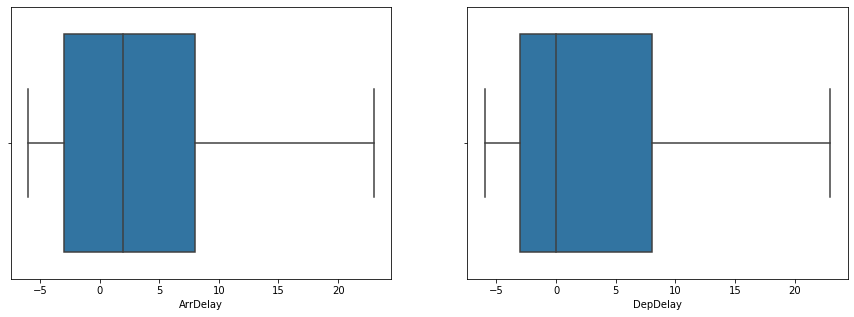

In [387]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.boxplot(x=flights['ArrDelay'], ax=ax[0])
sns.boxplot(x=flights['DepDelay'], ax=ax[1])
plt.show()

In [388]:
flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,97072.0,97072.000000,97072.000000,97072.000000,97072.000000,97072.000000,97072.000000,97072.000000,97072.000000,97072.000000,97072.000000,97072.000000,97072.000000
mean,2013.0,6.998465,15.839016,3.888011,12769.995169,12758.046821,1310.985217,3.129172,0.108806,1492.751586,3.350369,0.101533,0.000701
std,0.0,1.971390,8.778397,1.975094,1512.167058,1526.501442,461.586914,7.407395,0.311397,481.135549,7.352769,0.302035,0.026458
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-6.000000,0.000000,1.000000,-6.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,920.000000,-3.000000,0.000000,1118.000000,-3.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1305.000000,0.000000,0.000000,1515.000000,2.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,5.000000,14100.000000,14100.000000,1705.000000,8.000000,0.000000,1901.000000,8.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,23.000000,1.000000,2359.000000,23.000000,1.000000,1.000000


Now that the cleaning process is done, we proceed to analyse the dataset.

## Analyzing the dataset

The point here is to answer the following questions:

- *What are the average (mean) departure and arrival delays?*
- *How do the carriers compare in terms of arrival delay performance?*
- *Are some days of the week more prone to arrival days than others?*
- *Which departure airport has the highest average departure delay?*
- *Do **late** departures tend to result in longer arrival delays than on-time departures?*
- *Which route (from origin airport to destination airport) has the most **late** arrivals?*
- *Which route has the highest average arrival delay?*

So let's begin!

## 1 - What are the average (mean) departure and arrival delays?

That's a simple question we just have to use the **mean** method and apply it in the desired columns.

In [389]:
# col=['DepDelay', 'ArrDelay']
flights[col].mean()


DepDelay    3.129172
ArrDelay    3.350369
dtype: float64

## 2 - How do the carriers compare in terms of arrival delay performance?

To see how carries perform in arrival delay, I'll choose to plot boxplots aggregated by the carries

In [390]:
flights["Carrier"].count()

97072

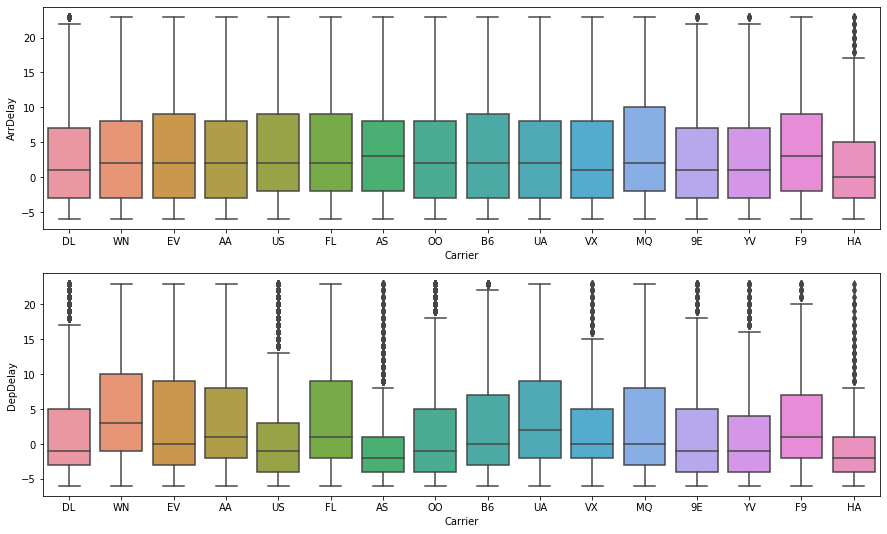

In [391]:
fig, ax = plt.subplots(2,1,figsize=(15,9))
sns.boxplot(x="Carrier", y="ArrDelay", data=flights, ax=ax[0])
sns.boxplot(x="Carrier", y="DepDelay", data=flights, ax=ax[1])
plt.show()

## 3 - Are some days of the week more prone to arrival days than others?

The approach here is to plot a chart where it'll possible to check the **amount of times** a day of the week had arrivals. To help visualize it better, I decided to choose an **barplot visualization**. The dataset refers to days of the week as numbers that begins with 1 being monday and 7 being sunday. 

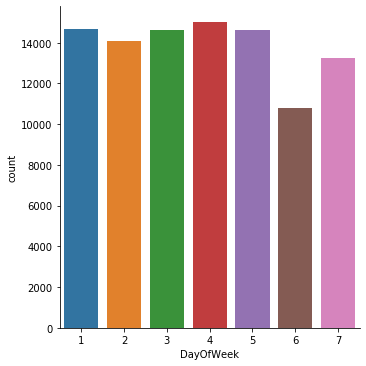

In [392]:
sns.catplot(x="DayOfWeek", kind="count",  data = flights)
plt.show()

## 4 - Which departure airport has the highest average departure delay?

To this question I'll plot a bar chart showing the departure delay per Airport. To do this, I'll create a new dataframe containing only **DepDelay** and **OriginAirportName**. After that, I'll group the df by **OriginAirportName** and calculate the **mean** value. 

Since there are many Airports name, I'll order by **descending values** and show only the **top5** in departure delay.

In [393]:
flights_group_airport_delayed = flights[["DepDelay","OriginAirportName"]]
flights_group_airport_delayed = flights_group_airport_delayed.groupby(["OriginAirportName"])["DepDelay"].mean()
df_flights_group_airport_delayed = pd.DataFrame(flights_group_airport_delayed)
df_flights_group_airport_delayed.reset_index(inplace= True)
df_flights_group_airport_delayed = df_flights_group_airport_delayed.sort_values(by = ["DepDelay"], ascending=False)

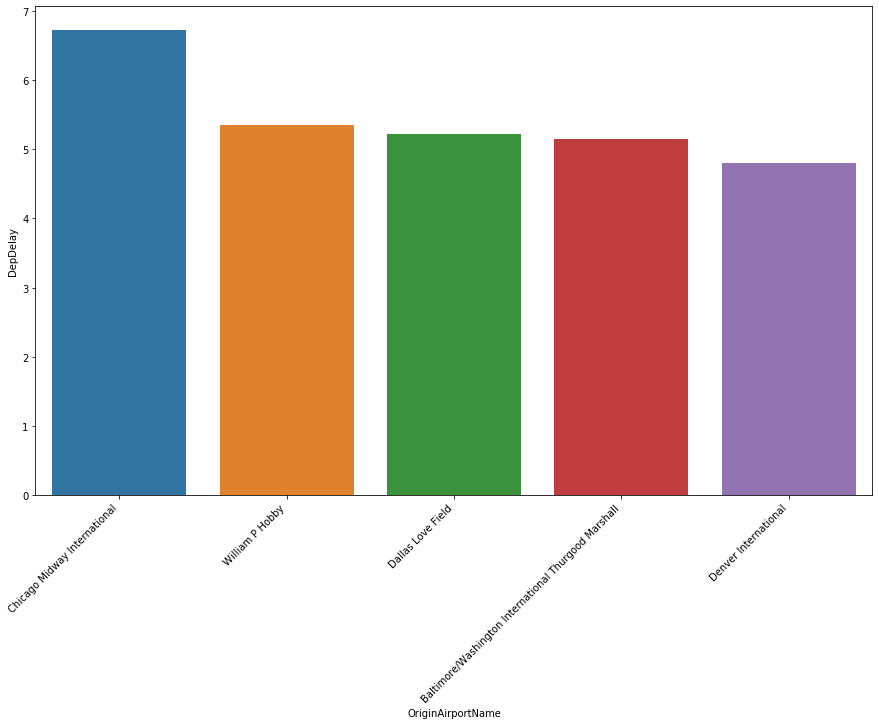

In [394]:
fig, ax = plt.subplots(figsize=(15,9))
g = sns.barplot(x="OriginAirportName", y="DepDelay", data = df_flights_group_airport_delayed.head(5), ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment = 'right')
plt.show()

## 5 - Do **late** departures tend to result in longer arrival delays than on-time departures?

To answer this question I'll separate the arrival times in **two**: the ones that had **departure late** and the other that **don't**. The choosen metric here will be **median** since I don't want to one huge arrival delay or departure delay impact in my analysis. 

In [395]:
flights_OnTime = flights[flights["DepDelay"] < 15]
flights_OnTime_median = flights_OnTime["ArrDelay"].median()

flights_delayed = flights[flights["DepDelay"] >= 15]
flights_delayed_median = flights_delayed["ArrDelay"].median()

In [396]:
print("Flights On Time median: %d" % (flights_OnTime_median))
print("Flights Delayed median: %d" % (flights_delayed_median))

Flights On Time median: 1
Flights Delayed median: 11


## 6 - Which route (from origin airport to destination airport) has the most **late** arrivals?

To this question I'll use the **flights_delayed dataframe** build in the previous question, and then **aggregate** the flights by **routes** and **count** them.

To aggregate by routes I'll simple gather the columns: **OriginAirportName** and **DestAirportName** 

In [397]:
flights_ArriveDelayed = flights[flights["ArrDel15"] >= 1]

flights_ArriveDelayed["Routes"] = flights["OriginAirportName"] + " -> " + flights["DestAirportName"]

flights_ArriveDelayed_aggRoutes = flights_ArriveDelayed.groupby("Routes")["ArrDel15"].sum()

C:\Users\lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [398]:
flights_ArriveDelayed_aggRoutes

Routes
Albuquerque International Sunport -> Chicago Midway International            3.0
Albuquerque International Sunport -> Dallas Love Field                       5.0
Albuquerque International Sunport -> Dallas/Fort Worth International         5.0
Albuquerque International Sunport -> Denver International                    7.0
Albuquerque International Sunport -> George Bush Intercontinental/Houston    2.0
                                                                            ... 
William P Hobby -> Ronald Reagan Washington National                         1.0
William P Hobby -> San Antonio International                                 3.0
William P Hobby -> San Diego International                                   5.0
William P Hobby -> Tampa International                                       5.0
William P Hobby -> Will Rogers World                                         2.0
Name: ArrDel15, Length: 1993, dtype: float64

In [399]:
flights_ArriveDelayed_aggRoutes= pd.DataFrame(flights_ArriveDelayed_aggRoutes)
flights_ArriveDelayed_aggRoutes.rename(columns={"ArrDel15":"Count"}, inplace = True)
flights_ArriveDelayed_aggRoutes.sort_values(by=["Count"], ascending = False, inplace = True)
flights_ArriveDelayed_aggRoutes.reset_index(inplace=True)

In [400]:
flights_ArriveDelayed_aggRoutes

,Routes,Count
0,Los Angeles International -> McCarran Internat...,37.0
1,San Francisco International -> Los Angeles Int...,37.0
2,Los Angeles International -> San Francisco Int...,35.0
3,Denver International -> Phoenix Sky Harbor Int...,33.0
4,Dallas/Fort Worth International -> Los Angeles...,27.0
...,...,...
1988,Detroit Metro Wayne County -> Cincinnati/North...,1.0
1989,Newark Liberty International -> John Wayne Air...,1.0
1990,Ronald Reagan Washington National -> Cleveland...,1.0
1991,Newark Liberty International -> Louisville Int...,1.0


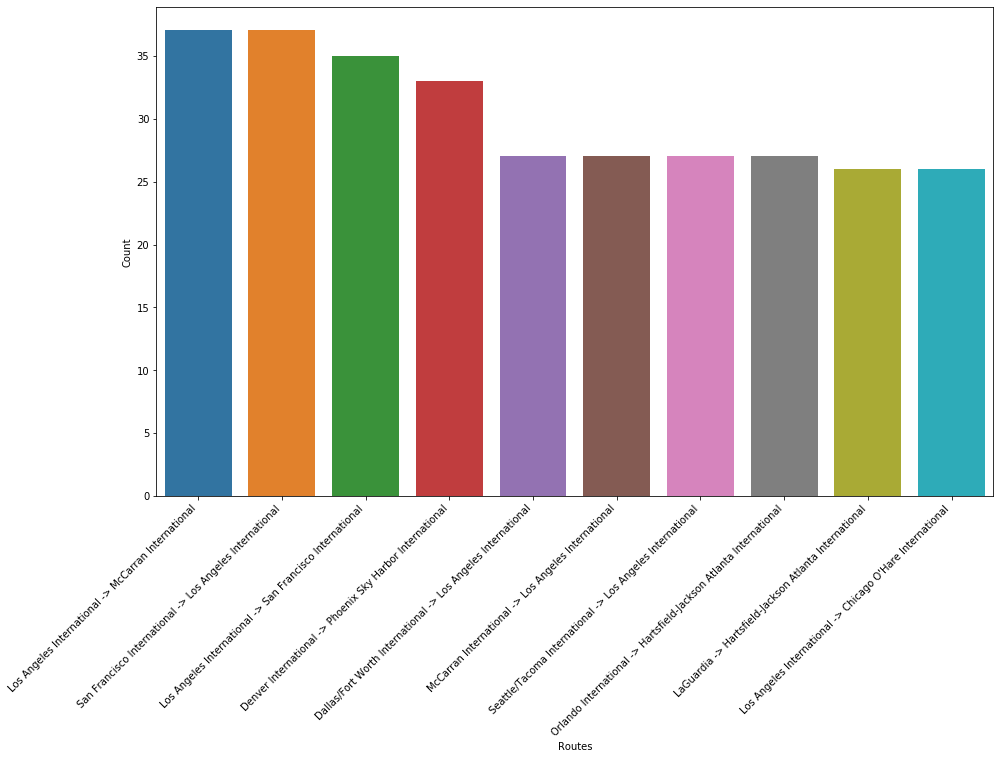

In [401]:
fig, ax = plt.subplots(figsize=(15,9))
chart_routes = sns.barplot(x="Routes", y="Count", data=flights_ArriveDelayed_aggRoutes.head(10), ax =ax)
chart_routes.set_xticklabels(chart_routes.get_xticklabels(), rotation=45, horizontalalignment = 'right')
plt.show()

## 7 - Which route has the highest average arrival delay?

In [402]:
df_flights_ArriveDelayed = pd.DataFrame(flights_ArriveDelayed)
flights_ArriveDelayed_groupRoute = df_flights_ArriveDelayed.groupby("Routes")["ArrDelay"].mean()
df_flights_ArriveDelayed_groupRoute = pd.DataFrame(flights_ArriveDelayed_groupRoute).reset_index().sort_values('ArrDelay', ascending = False)

In [406]:
df_flights_ArriveDelayed_groupRoute.head(5)

,Routes,ArrDelay
1886,Ted Stevens Anchorage International -> Long Be...,23.0
1979,William P Hobby -> Los Angeles International,23.0
1128,Memphis International -> Louis Armstrong New O...,23.0
113,Bradley International -> Palm Beach International,23.0
1984,William P Hobby -> Newark Liberty International,23.0
